In [70]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.regularizers import l2

In [71]:
dataset_path = "D:\ML-FINALS\Primary Data"
image_dir = os.path.join(dataset_path, "images")


In [72]:
folder_path = r="D:\ML-FINALS\Primary Data"
files = os.listdir(folder_path)

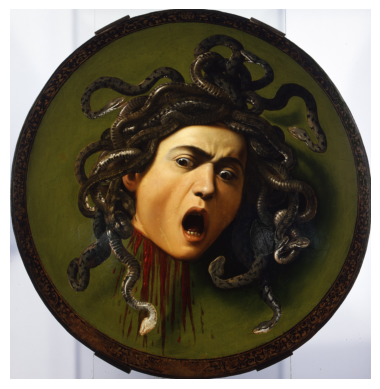

In [73]:
image_path = r"D:\ML-FINALS\Primary Data\Baroque\186670.jpg"
# Display the image using the displayImage function 


img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [74]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(tf.config.list_physical_devices('GPU'))


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7481147808728105429
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10057940992
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16827229115631055202
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [75]:
# Check if TensorFlow can access the GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"TensorFlow is using GPU: {physical_devices[0]}")
else:
    print("No GPU available.")

TensorFlow is using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [76]:
# SIZE = 256
# image_size = (SIZE, SIZE)

In [77]:
# # Initialize lists to store data
# X = []
# y_class = []
# class_ids = set()

# for art_style in os.listdir(folder_path):
#     style_path = os.path.join(folder_path, art_style)
#     if not os.path.isdir(style_path):
#         continue

#     print(f"Processing folder: {art_style}")
#     class_ids.add(art_style)  # Use art_style folder name as class

#     for filename in os.listdir(style_path):
#         if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#             image_path = os.path.join(style_path, filename)

#             img = cv2.imread(image_path)
#             if img is None:
#                 print(f"Warning: Could not load image {image_path}")
#                 continue

#             # Resize and normalize image
#             img = cv2.resize(img, image_size)
#             img = img / 255.0

#             X.append(img)
#             y_class.append(art_style)

# X = np.array(X, dtype=np.float32)


In [78]:
base_dir = r"D:\ML-FINALS\Primary Data"

In [79]:
styles = os.listdir(base_dir)
print(styles) # Print the list of styles to verify

['Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism', 'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism', 'Renaissance', 'Rococo', 'Romanticism', 'Symbolism', 'Western Medieval']


In [80]:
images = []
labels = []
base_dir = folder_path  # Use the existing folder_path variable
for style in files:  # Use the existing files variable which contains the art styles
    style_dir = os.path.join(base_dir, style)
    for image_name in os.listdir(style_dir):
        image_path = os.path.join(style_dir, image_name)
        try:
            img = Image.open(image_path).convert('RGB') # Load image and convert to RGB
            img = img.resize((512, 512)) # Resize images to a consistent size
            img_array = np.array(img)
            images.append(img_array)
            labels.append(style) # Use the style name as the label
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")

images = np.array(images)

c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (96714256 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
c:\Users\Coli\miniconda3\envs\py310\lib\site-packages\PIL\TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


In [81]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42, stratify=y_temp)

In [82]:
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(images)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(images)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(images)*100:.1f}%)")

Training set: 9075 samples (70.0%)
Validation set: 2594 samples (20.0%)
Test set: 1296 samples (10.0%)


In [83]:
y_train_np = np.array(y_train)
unique_elements, counts = np.unique(y_train_np, return_counts=True)
print("Counts of each style in y_train:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

y_val_np = np.array(y_val)
unique_elements, counts = np.unique(y_val_np, return_counts=True)
print("Counts of each style in y_val:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Counts of each style in y_train:
Academic_Art: 700
Art_Nouveau: 701
Baroque: 703
Expressionism: 700
Japanese_Art: 700
Neoclassicism: 701
Primitivism: 700
Realism: 701
Renaissance: 700
Rococo: 699
Romanticism: 700
Symbolism: 700
Western Medieval: 670
Counts of each style in y_val:
Academic_Art: 200
Art_Nouveau: 201
Baroque: 201
Expressionism: 200
Japanese_Art: 200
Neoclassicism: 201
Primitivism: 200
Realism: 200
Renaissance: 200
Rococo: 200
Romanticism: 200
Symbolism: 200
Western Medieval: 191


In [84]:
y_val_np = np.array(y_val)

# Get unique values and their counts
unique_elements, counts = np.unique(y_val_np, return_counts=True)

# Print the counts
print("Counts of each style in y_val:")
for element, count in zip(unique_elements, counts):
    print(f"{element}: {count}")

Counts of each style in y_val:
Academic_Art: 200
Art_Nouveau: 201
Baroque: 201
Expressionism: 200
Japanese_Art: 200
Neoclassicism: 201
Primitivism: 200
Realism: 200
Renaissance: 200
Rococo: 200
Romanticism: 200
Symbolism: 200
Western Medieval: 191


In [85]:
label_to_index = {style: i for i, style in enumerate(styles)}
y_train_encoded = to_categorical([label_to_index[label] for label in y_train], num_classes=len(styles))
y_val_encoded = to_categorical([label_to_index[label] for label in y_val], num_classes=len(styles))
y_test_encoded = to_categorical([label_to_index[label] for label in y_test], num_classes=len(styles))

# Resize images to 128x128 to match model input and reduce memory usage
X_train_resized = np.array([cv2.resize(img, (128, 128)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (128, 128)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (128, 128)) for img in X_test])

# Normalize the resized image data
X_train = X_train_resized.astype('float32') / 255.0
X_val = X_val_resized.astype('float32') / 255.0
# Keep X_test at 512x512 but process in smaller batches to avoid memory issues
X_test_512 = X_test_resized.astype('float32') / 255.0

# For memory efficiency during inference, we'll process X_test in smaller batches
# The model expects 128x128 input, so we'll resize on-the-fly during prediction
X_test = X_test_resized.astype('float32') / 255.0

In [86]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

# Define the styles based on your provided image
styles = [
    'Academic_Art', 'Art_Nouveau', 'Baroque', 'Expressionism',
    'Japanese_Art', 'Neoclassicism', 'Primitivism', 'Realism',
    'Renaissance', 'Rococo', 'Romanticism', 'Symbolism',
    'Western Medieval'
]

# The enhanced model architecture (as provided previously)
model = tf.keras.Sequential([
    # Block 1
    tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.1),

    # Block 2
    tf.keras.layers.Conv2D(128, 3, padding='same', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, 3, padding='same', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(0.2),

    # Block 3 (Enhanced: Added a second Conv2D layer and MaxPooling2D, increased dropout)
    tf.keras.layers.Conv2D(256, 3, padding='same', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256, 3, padding='same', kernel_regularizer=l2(1e-4)), # Added this layer
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2), # Added this layer to maintain downsampling
    tf.keras.layers.Dropout(0.3), # Slightly increased dropout for this deeper block

    # Final pooling layer before dense layers
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dense layers (Slightly adjusted dropout)
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3), # Adjusted dropout
    tf.keras.layers.Dense(len(styles), activation='softmax') # len(styles) will now be 13
])

# ...existing code...

# Enhanced model for better performance
# model = tf.keras.Sequential([
#     # Block 1 - Start smaller, build up
#     tf.keras.layers.Conv2D(32, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.Conv2D(64, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.MaxPooling2D(2),
#     tf.keras.layers.Dropout(0.25),

#     # Block 2
#     tf.keras.layers.Conv2D(128, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.Conv2D(128, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.MaxPooling2D(2),
#     tf.keras.layers.Dropout(0.25),

#     # Block 3
#     tf.keras.layers.Conv2D(256, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.Conv2D(256, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.MaxPooling2D(2),
#     tf.keras.layers.Dropout(0.25),

#     # Block 4 - Add another block for better feature extraction
#     tf.keras.layers.Conv2D(512, 3, padding='same', kernel_regularizer=l2(1e-4)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation('relu'),
#     tf.keras.layers.GlobalAveragePooling2D(),

#     # Dense layers - Reduced complexity
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(1e-3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(len(styles), activation='softmax')
# ])

In [87]:
model.build(input_shape=(None, 128, 128, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_15 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_16 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 activation_14 (Activation)  (None, 128, 128, 64)     

In [88]:
from tensorflow.keras.callbacks import EarlyStopping


In [89]:
# Change learning rate from 1e-4 to 3e-4
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)  

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

In [90]:
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=20,         
    restore_best_weights=True,
    verbose=1,
    min_delta=0.0001,      
)

In [91]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=1, min_delta=0.0001)

In [92]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=200,
    validation_data=(X_val, y_val_encoded),  
    callbacks=[early_stop, reduce_lr],
    batch_size=32, 
    verbose=1
)


Epoch 1/200
284/284 [==============================] - 42s 142ms/step - loss: 2.6410 - accuracy: 0.2130 - val_loss: 2.8716 - val_accuracy: 0.1025 - lr: 5.0000e-04
Epoch 2/200
284/284 [==============================] - 40s 139ms/step - loss: 2.3907 - accuracy: 0.3013 - val_loss: 2.3912 - val_accuracy: 0.2899 - lr: 5.0000e-04
Epoch 3/200
284/284 [==============================] - 40s 139ms/step - loss: 2.2763 - accuracy: 0.3244 - val_loss: 2.3524 - val_accuracy: 0.3319 - lr: 5.0000e-04
Epoch 4/200
284/284 [==============================] - 40s 139ms/step - loss: 2.1947 - accuracy: 0.3668 - val_loss: 3.0947 - val_accuracy: 0.2278 - lr: 5.0000e-04
Epoch 5/200
284/284 [==============================] - 40s 139ms/step - loss: 2.1281 - accuracy: 0.3993 - val_loss: 2.6248 - val_accuracy: 0.2718 - lr: 5.0000e-04
Epoch 6/200
284/284 [==============================] - 40s 139ms/step - loss: 2.0732 - accuracy: 0.4184 - val_loss: 2.5026 - val_accuracy: 0.2860 - lr: 5.0000e-04
Epoch 7/200
284/284 [=

In [98]:
print(history.history['accuracy'][-1])
print(history.history['val_accuracy'][-1])

0.9509642124176025
0.5882806181907654


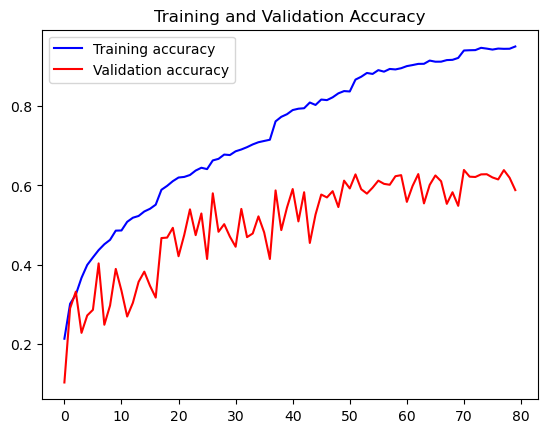

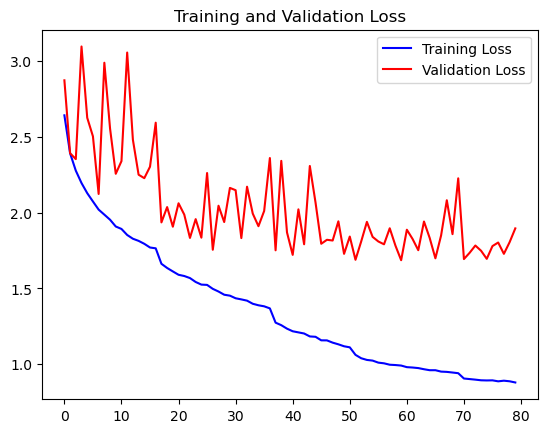

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [95]:
model.evaluate(X_test, y_test_encoded)

41/41 [==============================] - 1s 35ms/step - loss: 1.6884 - accuracy: 0.6204


[1.6883503198623657, 0.6203703880310059]

In [96]:
# Print Classification Report. Print which number represents which art style
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = [label_to_index[label] for label in y_test]
print(classification_report(y_test_classes, y_pred_classes, target_names=styles))

41/41 [==============================] - 2s 31ms/step
                  precision    recall  f1-score   support

    Academic_Art       0.75      0.54      0.63       100
     Art_Nouveau       0.84      0.46      0.59       100
         Baroque       0.62      0.65      0.63       100
   Expressionism       0.61      0.74      0.67       100
    Japanese_Art       0.93      0.70      0.80       100
   Neoclassicism       0.76      0.73      0.74       100
     Primitivism       0.78      0.69      0.73       100
         Realism       0.47      0.57      0.52       100
     Renaissance       0.45      0.67      0.54       100
          Rococo       0.63      0.62      0.62       100
     Romanticism       0.50      0.53      0.51       100
       Symbolism       0.41      0.58      0.48       100
Western Medieval       0.84      0.58      0.69        96

        accuracy                           0.62      1296
       macro avg       0.66      0.62      0.63      1296
    weighted avg

In [97]:
model.save('model.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Coli\AppData\Local\Temp\tmpe_0ntpxs\assets


INFO:tensorflow:Assets written to: C:\Users\Coli\AppData\Local\Temp\tmpe_0ntpxs\assets
